##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
##################### Tail #####################
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629

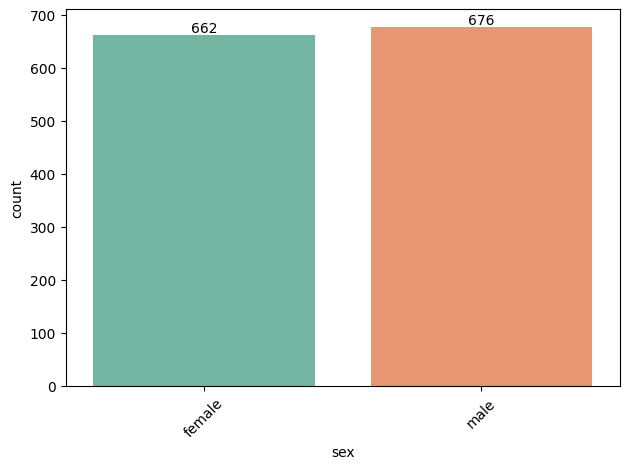

        smoker      Ratio
smoker                   
no        1064  79.521674
yes        274  20.478326
##########################################


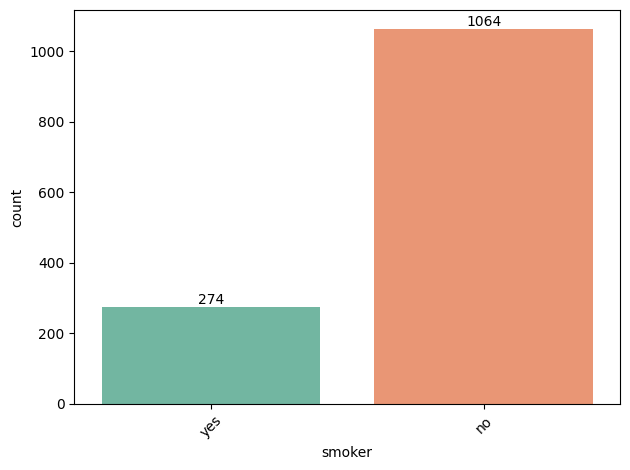

           region      Ratio
region                      
southeast     364  27.204783
southwest     325  24.289985
northwest     325  24.289985
northeast     324  24.215247
##########################################


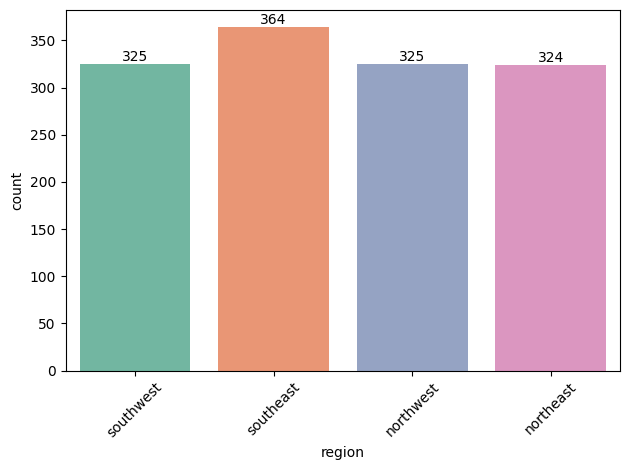

          children      Ratio
children                     
0              574  42.899851
1              324  24.215247
2              240  17.937220
3              157  11.733931
4               25   1.868460
5               18   1.345291
##########################################


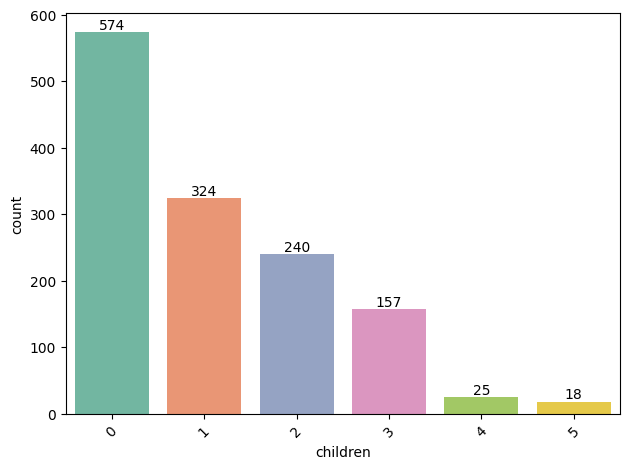

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
5%         18.000000
10%        19.000000
20%        24.000000
30%        29.000000
40%        34.000000
50%        39.000000
60%        44.000000
70%        49.000000
80%        54.000000
90%        59.000000
95%        62.000000
99%        64.000000
max        64.000000
Name: age, dtype: float64
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
5%         21.256000
10%        22.990000
20%        25.326000
30%        27.360000
40%        28.797000
50%        30.400000
60%        32.032000
70%        33.660000
80%        35.860000
90%        38.619500
95%        41.106000
99%        46.407900
max        53.130000
Name: bmi, dtype: float64
         TARGET_MEAN
sex                 
female  12569.578844
male    13956.751178


         TARGET_MEAN
smoker              
no       8434.268298
yes     32050.231832


            TARGET_MEAN
region                 
northeast  134

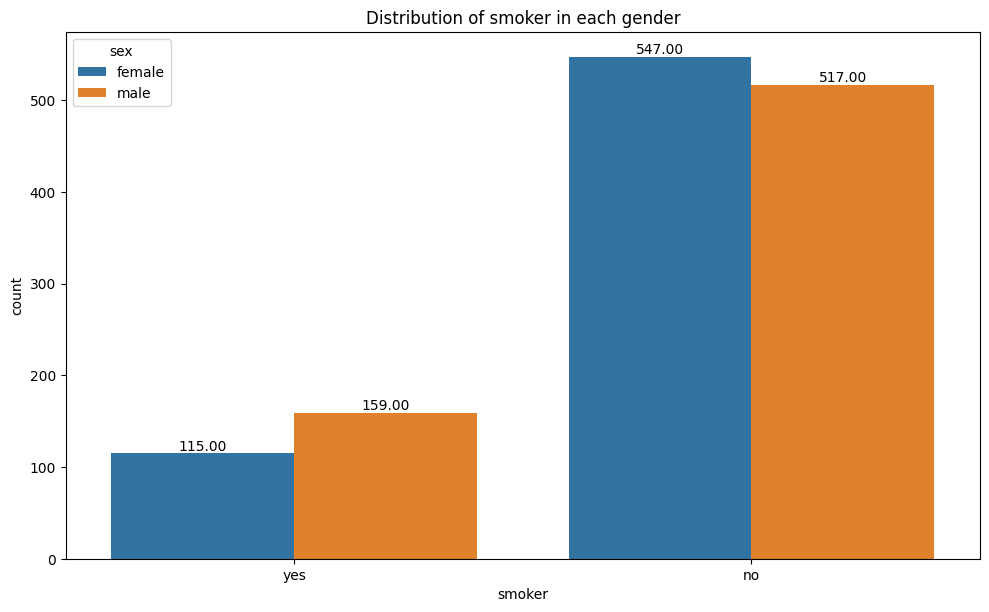

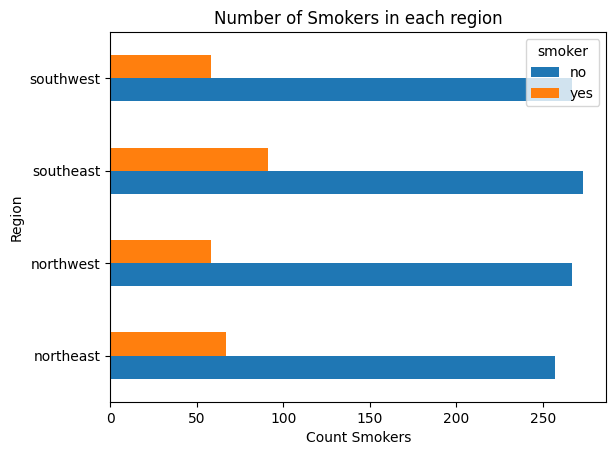

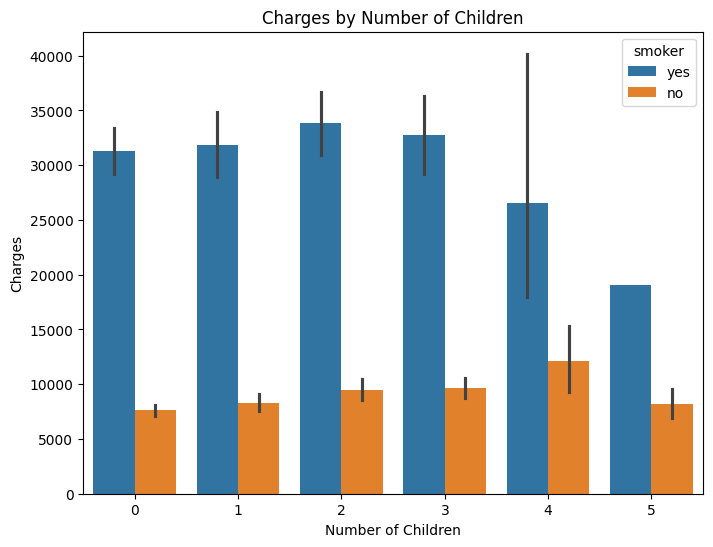

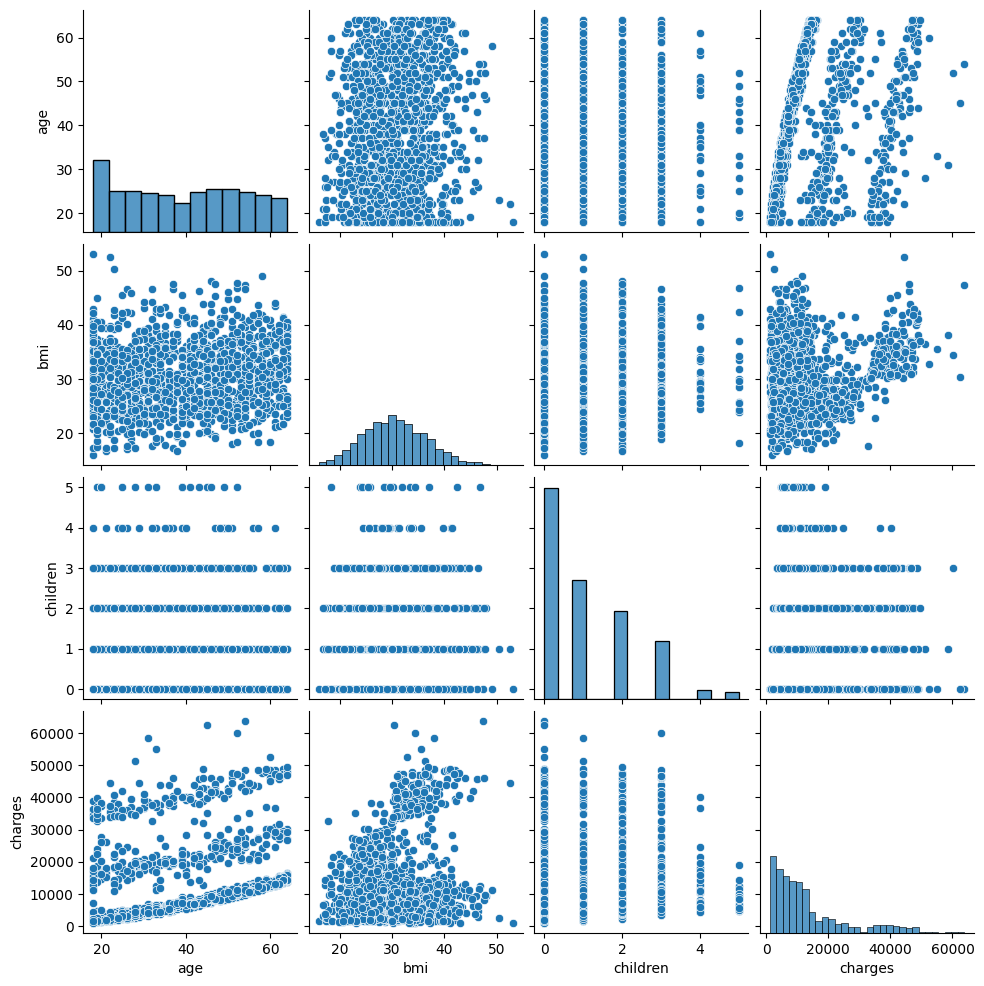

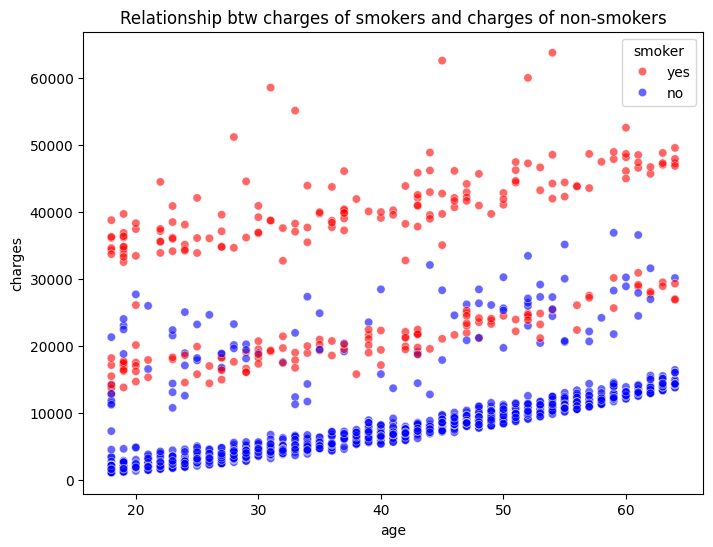

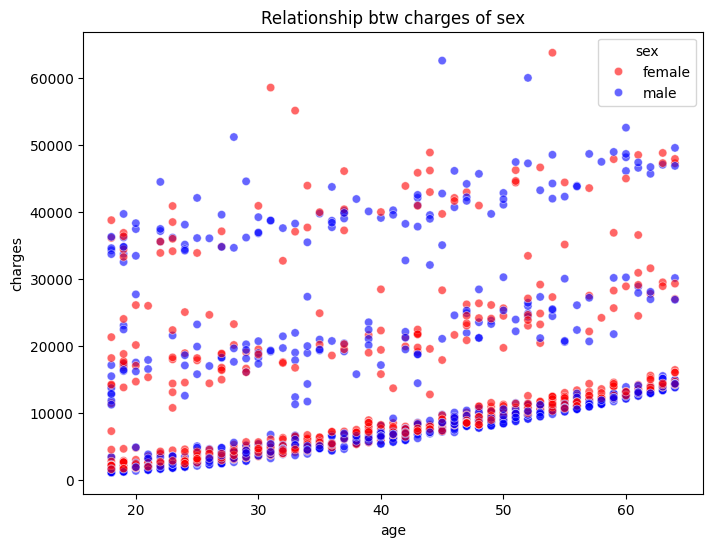

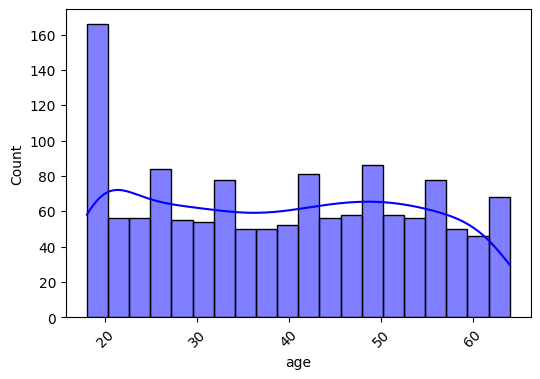

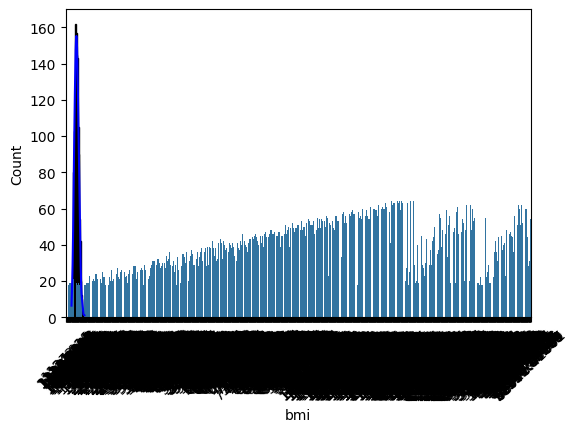

             bmi_mean
charges              
1121.87390     23.210
1131.50660     30.140
1135.94070     33.330
1136.39940     33.660
1137.01100     34.100
...               ...
55135.40209    35.530
58571.07448    38.095
60021.39897    34.485
62592.87309    30.360
63770.42801    47.410

[1337 rows x 1 columns]




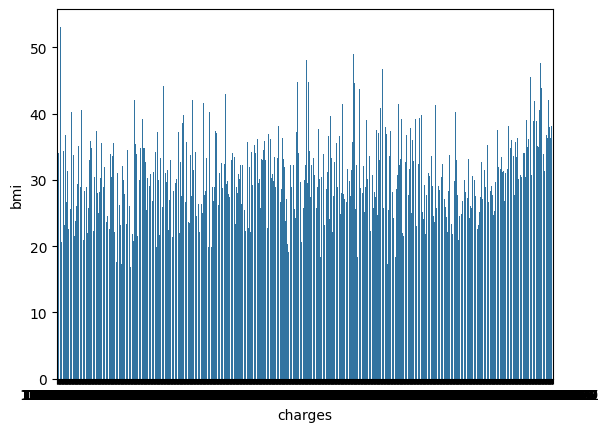

Empty DataFrame
Columns: [n_miss, ratio]
Index: []
sex : 2
        COUNT     RATIO   TARGET_MEAN
sex                                  
female    662  0.494768  12569.578844
male      676  0.505232  13956.751178


smoker : 2
        COUNT     RATIO   TARGET_MEAN
smoker                               
no       1064  0.795217   8434.268298
yes       274  0.204783  32050.231832


region : 4
           COUNT     RATIO   TARGET_MEAN
region                                  
northeast    324  0.242152  13406.384516
northwest    325  0.242900  12417.575374
southeast    364  0.272048  14735.411438
southwest    325  0.242900  12346.937377


children : 6
          COUNT     RATIO   TARGET_MEAN
children                               
0           574  0.428999  12365.975602
1           324  0.242152  12731.171832
2           240  0.179372  15073.563734
3           157  0.117339  15355.318367
4            25  0.018685  13850.656311
5            18  0.013453   8786.035247


Observations: 1338
Variables

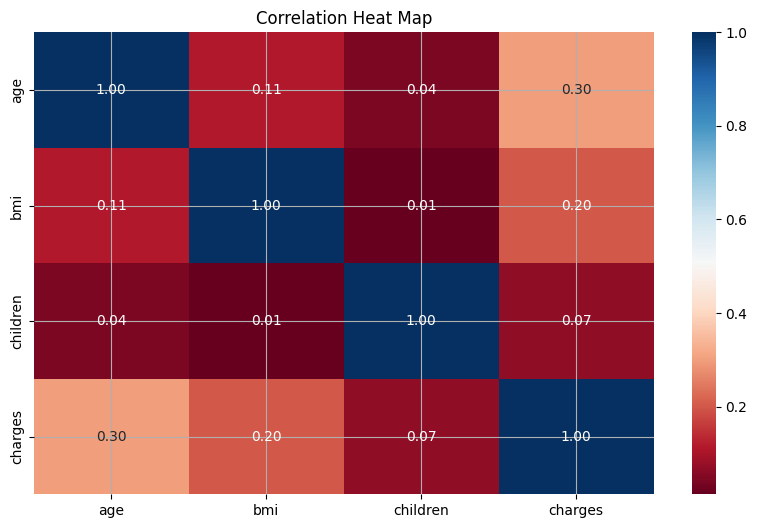

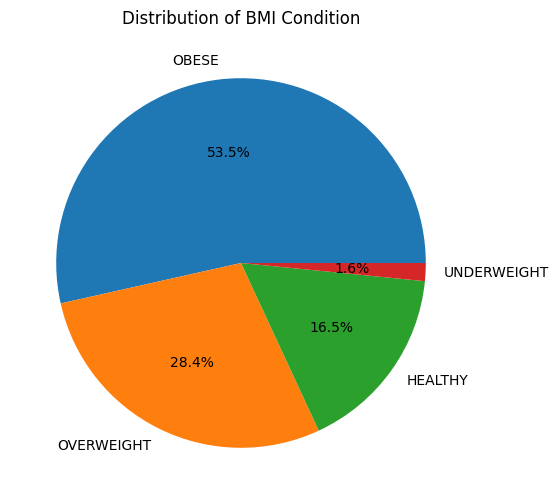

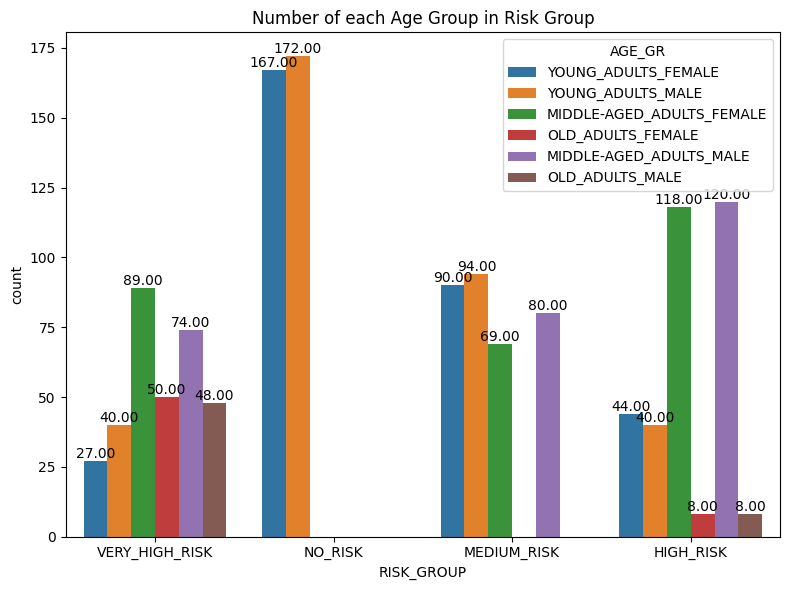

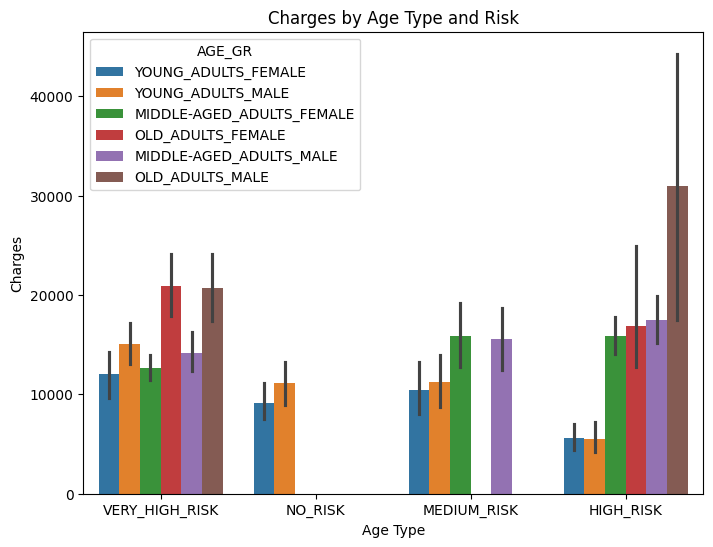

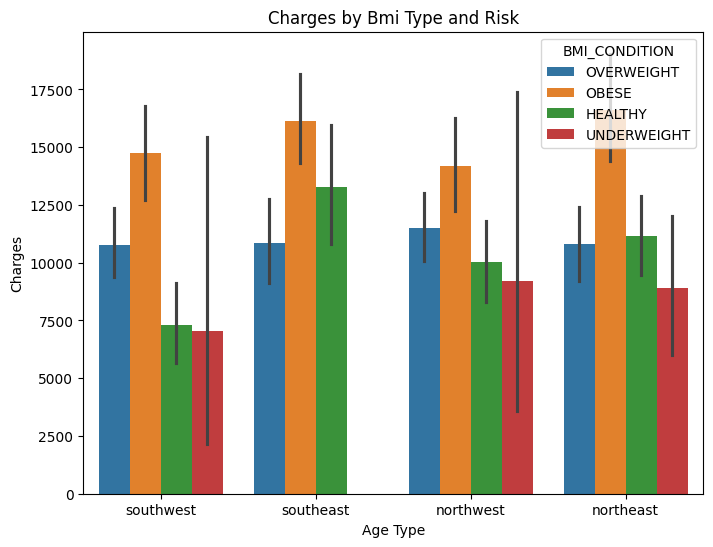

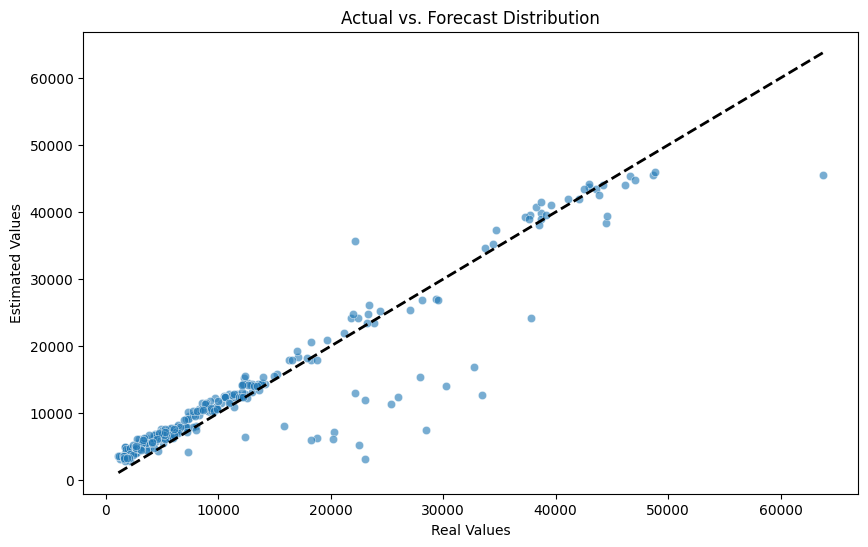

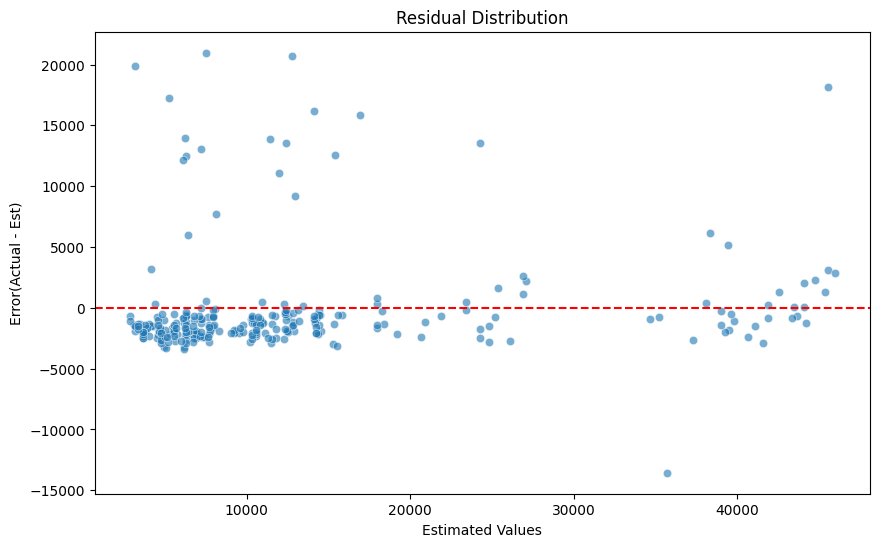

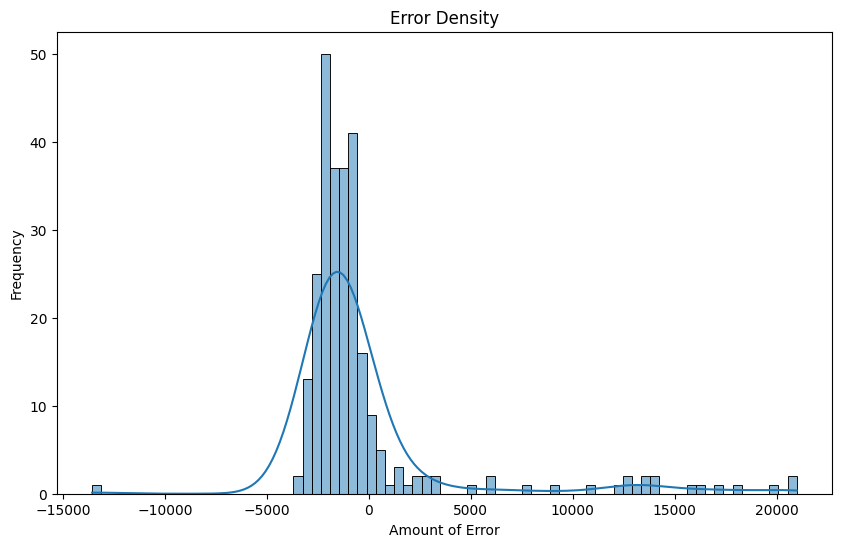

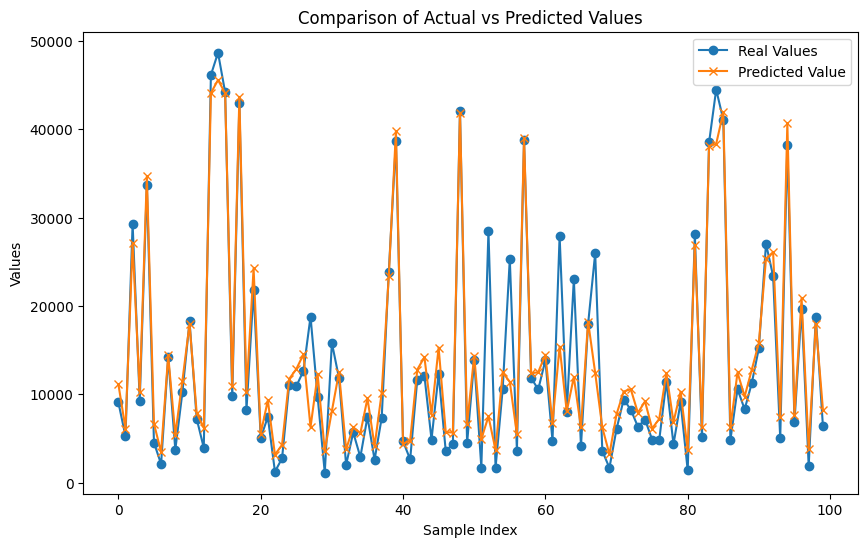

Regression Model Perfomance Metrics
RMSE:4366.8133
MAE:2538.9252
R^2 Skoru:0.8772


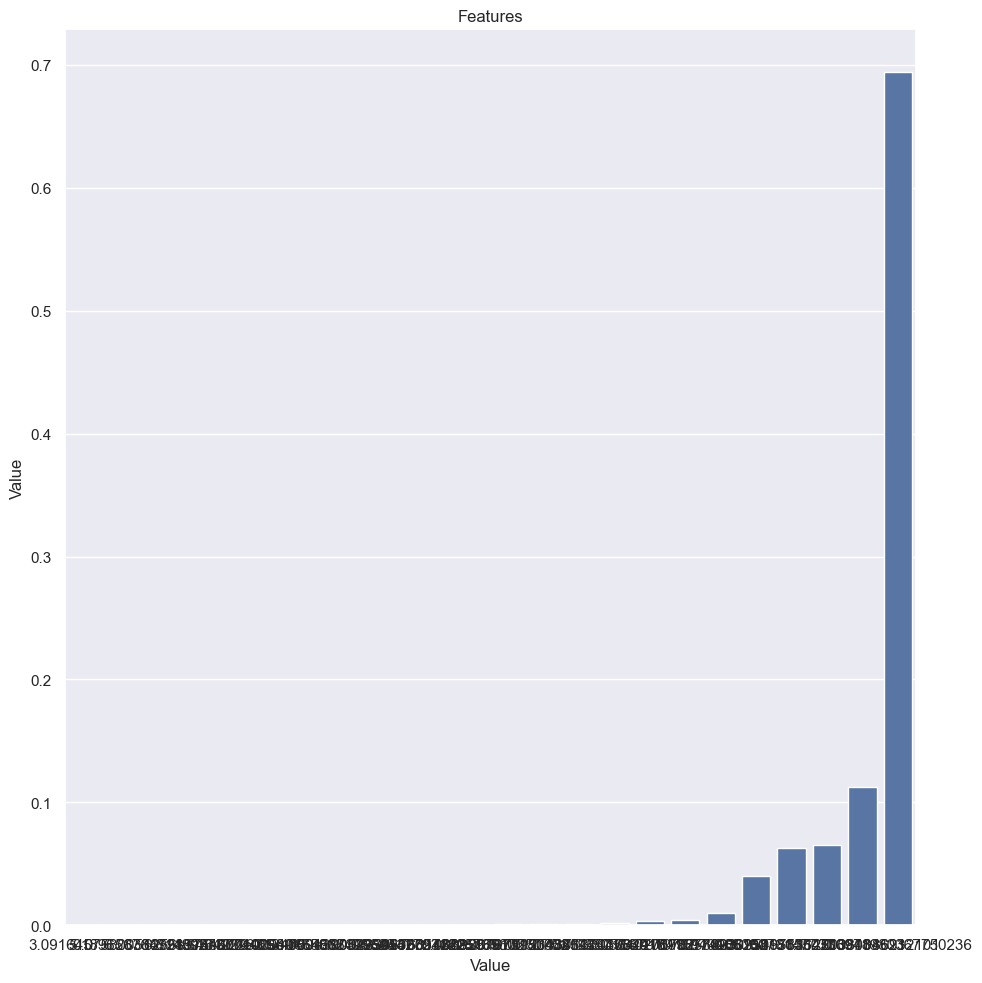

None


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

import warnings
warnings.simplefilter(action="ignore")
url = "https://raw.githubusercontent.com/ttna812/health_insurance_2023/main/insurance.csv"
data = pd.read_csv(url)


def check_data(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_data = data.select_dtypes(include='number')
    # quantile() işlemi
    quantiles = numeric_data.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T
    print(quantiles)
check_data(data)
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(data)
num_cols = [col for col in num_cols if col not in "charges"]
## Visualization
    # Analysis of Categorical Var
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        ax= sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")
        plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.0f')
    plt.tight_layout()
    plt.show(block=True)
for col in cat_cols:
    cat_summary(data, col, plot=True) 
plt.figure(figsize=(10,6))
sns.countplot(x='smoker',data=data,hue='sex')
for container in plt.gca().containers:
    plt.gca().bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.title('Distribution of smoker in each gender')

smokers_by_region = data.groupby('region')['smoker'].value_counts().unstack()
smokers_by_region.plot(kind='barh')
plt.xlabel('Count Smokers')
plt.ylabel('Region')
plt.title('Number of Smokers in each region')

plt.figure(figsize=(8,6))
sns.barplot(x=data['children'], y=data['charges'],hue=data['smoker'])
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges by Number of Children')

sns.pairplot(data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=data.age,y=data.charges,hue=data.smoker,palette=['red','blue'],alpha=0.6)
plt.title('Relationship btw charges of smokers and charges of non-smokers')

plt.figure(figsize=(8,6))
sns.scatterplot(x=data.age,y=data.charges,hue=data.sex,palette=['red','blue'],alpha=0.6)
plt.title('Relationship btw charges of sex')
## Analysis of Numerical Var
def num_sum(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)  # Print descriptive statistics
    if plot:
        plt.figure(figsize=(6, 4))  
        sns.histplot(data=dataframe, x=col_name, bins=20, kde=True, color="blue")  
        plt.xticks(rotation=45)  
for col in num_cols:
    num_sum(data, col, plot=True)  
## Analysis of Categorical Var by Target
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
for col in cat_cols:
    target_summary_with_cat(data, "charges", col, plot=True)
## Analysis of Numerical Var by Target
def num_sum(dataframe, target, numerical_col,plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')    
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=False)
for col in num_cols:
    num_sum(data, "charges", col, plot=True)
## Correlation 
def corr_cols(dataframe,plot=False,corr_th=0.7):
    numeric_data = dataframe.select_dtypes(include=[np.number])
    corr_df = numeric_data.corr()
    corr_matrix = corr_df.abs()
    # Create upper triangular matrix
    upper_tri_matr= corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    high_corr= [(col,row)   
                for col in corr_matrix.columns
                for row in corr_matrix.index
                if not pd.isna(upper_tri_matr.loc[row,col]) and abs(upper_tri_matr.loc[row,col]) > corr_th]  
    if plot:
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_df,annot= True,fmt=".2f",cmap = "RdBu")
        plt.title("Correlation Heat Map")
    return high_corr  
corr_cols(data,plot=True) 
## Distribution of Dependent Variable
data['charges'].hist(bins=100)
# Outliers Analysis:
def outlier_threshold(dataframe,col_name,q1=0.10,q3=0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr * 1.5)
    upper_bound = quartile3 + (iqr * 1.5)
    return lower_bound,upper_bound

def check_outlier(dataframe, col_name):
    lower_bound, upper_bound = outlier_threshold(dataframe, col_name)
    return ((dataframe[col_name] > upper_bound) | (dataframe[col_name] < lower_bound)).any()

# Missing Value Analysis
def missing_values_table(dataframe,na_name= False): #A boolean flag (default False). If True, the function returns a list of column names that have missing values.
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)    
    ratio = (dataframe[na_columns].isnull().sum()/dataframe.shape[0]*100).sort_values(ascending = False) # (Number of missing values/total rows)*100
    missing_data = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=['n_miss','ratio'])
    print(missing_data,end='\n')
    if na_name:
        return na_columns
missing_values_table(data)
# Rare analysis 
def rare_analy(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', dataframe[col].nunique())
        print(pd.DataFrame({
            'COUNT': dataframe[col].value_counts(),
            'RATIO': dataframe[col].value_counts() / len(dataframe),
            'TARGET_MEAN': dataframe.groupby(col)[target].mean()
        }), end='\n\n\n')
rare_analy(data,"charges",cat_cols)  
def rare_encode(dataframe,rare_percent):
    temp_df= dataframe.copy()
    rare_col= [col for col in temp_df.columns if temp_df[col].dtypes == '0' and (temp_df[col].value.counts()/len(temp_df)< rare_percent).any(axis= None)]
    for var in rare_col:
        tmp= temp_df[var].value_counts()/len(temp_df)
        rare_label = tmp[tmp < rare_percent].index
        temp_df[var]= np.where(temp_df[var].isin(rare_label),'Rare',temp_df[var])
    return temp_df
rare_encode(data, 0.01)
# Create additional filters
male_filter= data['sex'] == 'male'
data.loc[male_filter,'AGE_GR']= pd.cut(
    data.loc[male_filter,'age'],
    bins= [0,40,60,100],
    labels = ['YOUNG_ADULTS_MALE','MIDDLE-AGED_ADULTS_MALE','OLD_ADULTS_MALE'],
    right= False
)
data['AGE_GR']= data['AGE_GR'].astype(str)
female_filter= data['sex'] == 'female'
data.loc[female_filter,'AGE_GR'] = pd.cut(
    data.loc[female_filter,'age'],
    bins= [0,40,60,100],
    labels= ['YOUNG_ADULTS_FEMALE', 'MIDDLE-AGED_ADULTS_FEMALE','OLD_ADULTS_FEMALE'],
    right= False
).astype(str)

data['BMI_CONDITION']= pd.cut(x= data['bmi'],bins=[0,18.5,24.9,29.9,100],
                              labels= ['UNDERWEIGHT','HEALTHY','OVERWEIGHT','OBESE',]).astype(str)
# Define who smoke & overweight/obese
data['RISK_HIGH']=((data['smoker']== 'yes') & (data['BMI_CONDITION'].isin(['OVERWEIGHT','OBESE_1','OBESE_2','OBESE_3']))).astype(int)
data['RISK_MEDIUM']= data['BMI_CONDITION'].isin(['OVERWEIGHT','OBESE_1','OBESE_2','OBESE_3']).astype(int)
data['RISK_SCORE']=data['RISK_HIGH']*50 + data['RISK_MEDIUM']*25 + data['age']
data['RISK_GROUP']= pd.qcut(x= data['RISK_SCORE'], q=4 ,labels=['NO_RISK','MEDIUM_RISK','HIGH_RISK','VERY_HIGH_RISK']).astype(str)
data['BMI_RATIO_AGE']= data['bmi']/data['age']
data['CHILDREN_SMOKER']= data['children']*data['smoker'].map({'yes': 1, 'no': 0})
data['AGE_SQ']= data['age']**2
data['BMI_CUBED']= data['bmi']**3
data.columns = [col.upper() for col in data.columns]
    # Distribution of BMI condition
smoker_counts = data['BMI_CONDITION'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of BMI Condition')    
    # Distribution of each age group in risk
plt.figure(figsize=(8,6))
sns.countplot(x=data['RISK_GROUP'],data= data,hue= data['AGE_GR'])
for container in plt.gca().containers:
    plt.gca().bar_label(container,fmt='%.2f')
plt.title('Number of each Age Group in Risk Group')
plt.tight_layout()
    # Which age group charges more?
plt.figure(figsize=(8,6))
sns.barplot(x=data['RISK_GROUP'],y=data['CHARGES'],hue=data['AGE_GR'])
plt.xlabel('Age Type')
plt.ylabel('Charges')
plt.title('Charges by Age Type and Risk')
    # Which BMI type charge more
plt.figure(figsize=(8,6))
sns.barplot(x=data['REGION'],y=data['CHARGES'],hue=data['BMI_CONDITION'])
plt.xlabel('Age Type')
plt.ylabel('Charges')
plt.title('Charges by Bmi Type and Risk')
## Encoding
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(data)
    # Label Encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
binary_cols = [col for col in data.columns if data[col].dtypes == "O" and data[col].nunique() == 2]
for col in binary_cols:
    data = label_encoder(data, col)
    # One-hot encoding
cat_cols = [col for col in cat_cols if col not in binary_cols]
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
data= one_hot_encoder(data,cat_cols)

# Standardization
num_cols = [col for col in num_cols if col not in ["CHARGES"]]
scaler= RobustScaler()
data[num_cols]= scaler.fit_transform(data[num_cols])
print(data.head(10))
## Model Analysis (Predictions)
data['LOGA_CHARGES']= np.log1p(data['CHARGES'])
y= data['CHARGES']
x= data.drop(['LOGA_CHARGES','CHARGES'],axis=1)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.20,random_state=42)
models= [('LR',LinearRegression()),
         ('RIDGE',Ridge()),
         ('LASSO',Lasso()),
         ('ELASTICNET',ElasticNet()),
         ('KNN',KNeighborsRegressor(n_jobs=1)),
         ('CART',DecisionTreeRegressor()),
         ('RF',RandomForestRegressor(n_jobs=1)),
         ('GBM',GradientBoostingRegressor()),
         ('XGBOOST',XGBRegressor(object='reg:squarederror', n_jobs=1)),
         ('CATBOOTS',CatBoostRegressor(verbose= False,thread_count=1))
         ]
rmse_scores= []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times= []
models_names = []
# Loop
for name, regressor in models:
    start_time = time.time()
    regressor.fit(x_train, y_train)
    y_predict = regressor.predict(x_test)
    # Calc rmse
    rmse = np.mean(np.sqrt(-cross_val_score(regressor,x,y,cv=5,scoring= 'neg_mean_squared_error')))
    rmse_scores.append(rmse)
    # Calc R2
    r2= metrics.r2_score(y_test,y_predict)
    r2_scores.append(r2)
    # Calc mae
    mae = metrics.mean_absolute_error(y_test,y_predict)
    mae_scores.append(mae)
    # Calc mse
    mse= metrics.mean_squared_error(y_test,y_predict)
    mse_scores.append(mse)
    # Calc the time of execution
    execution_time= time.time() - start_time
    execution_times.append(execution_time)
    # Store model name
    models_names.append(name)

# Create DF hold all metrics + execution times
results_df = pd.DataFrame({
    'Model': models_names,
    'RMSE': rmse_scores,
    'R^2 SCORE': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'EXECUTION TIME (S)': execution_times
    })
print(results_df)
## Hyperparameter opimization
rmse_scores= []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times= []
models_names = []
param_grids={
    'LR': {},
    'RIDGE': {'alpha':[0.01,0.1,1.0,10.00,100.00]},
    'LASSO': {'alpha':[0.01,1.0,10.00,100.00]},
    'ELASTICNET': {'alpha':[0.01,0.1,1.0,10.00,100.00],'l1_ratio': [0.1,0.3,0.7,0.9]},
    'KNN': {'n_neighbors': [1,3,5,7,9]},
    'CART': {"max_depth":[None,5,10,20,30],'min_samples_leaf': [1,2,3]},
    'GBM': {'n_estimators':[10,30,50,70,100],'learning_rate':[0.005,0.01,0.05,0.1]},
    'XGBOOST': {'n_estimators':[10,30,50,70,100],'learning_rate':[0.005,0.01,0.05,0.1]},
    'CATBOOST': {'iterations': [10,30,50,70,100],'learning_rate': [0.005,0.01,0.05,0.1],'depth': [3,4,5,6,7]}
}
best_global_score= np.inf
best_global_model= None

for name, regressor in models:
    start_time = time.time()

    if param_grids.get(name):
        grid_search= GridSearchCV(regressor,param_grid= param_grids[name],cv = 5, n_jobs= -1)
        grid_search.fit(x_train, y_train)
        best_model= grid_search.best_estimator_
    else:
        best_model = regressor
        best_model.fit(x_train, y_train)
    y_predict= best_model.predict(x_test)
        # Calc rmse
    rmse = np.sqrt(mean_squared_error(y_test,y_predict))
    rmse_scores.append(rmse)
    if rmse < best_global_score:
        best_global_score = rmse
        best_global_model = best_model
    # Calc R2
    r2= metrics.r2_score(y_test,y_predict)
    r2_scores.append(r2)
    # Calc mae
    mae = metrics.mean_absolute_error(y_test,y_predict)
    mae_scores.append(mae)
    # Calc mse
    mse= metrics.mean_squared_error(y_test,y_predict)
    mse_scores.append(mse)
    # Calc the time of execution
    execution_time= time.time() - start_time
    execution_times.append(execution_time)
    # Store model name
    models_names.append(name)
results_with_tuning_df= pd.DataFrame({
        'MODEL': models_names,
        'RMSE': rmse_scores,
        'R^2 SCORE': r2_scores,
        'MAE': mae_scores,
        'MSE': mse_scores,
        'EXECUTION TIME (S)': execution_times
    })
results_with_tuning_df
choosen_model= best_global_model
y_final_prediction = choosen_model.predict(x_test)
final_y_pred= (y_final_prediction)
final_y_test = (y_test)
## Predictions
results= pd.DataFrame({"Predicted Value": final_y_pred,"True Value": final_y_test})
results['Difference']= results['True Value'] - results['Predicted Value']
results['Abs Difference']= results['Difference'].abs()
    # Top 5 worst predictions
print('Top 5 worst predictions:')
print(results.sort_values(by='Abs Difference',ascending= False).head(5).drop('Abs Difference',axis= 1))
    # Top 5 best predictions
print('\nTop 5 Best predictions:')
print(results.sort_values(by='Abs Difference').head().drop('Abs Difference', axis=1))
best_global_model.fit(x_train,y_train)
y_final_prediction= best_global_model.predict(x_test)
## Model predictions
    # Chart comparison btw : reality vs forecast scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_final_prediction,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Real Values')
plt.ylabel('Estimated Values')
plt.title('Actual vs. Forecast Distribution')
    # Residual plot
residuals= y_test - y_final_prediction
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_final_prediction,y=residuals,alpha =0.6)
plt.axhline(y=0, color ='r', linestyle = '--')
plt.xlabel('Estimated Values')
plt.ylabel('Error(Actual - Est)')
plt.title('Residual Distribution')
    # Error Density Graph
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde= True)
plt.xlabel('Amount of Error')
plt.ylabel('Frequency')
plt.title('Error Density')
    # Chart to comparison btw actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100],label='Real Values',marker = 'o')
plt.plot(y_final_prediction[:100],label='Predicted Value',marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()
    #Perfomance Metrics
print("Regression Model Perfomance Metrics")
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_final_prediction)):.4f}')
print(f'MAE:{mean_absolute_error(y_test,y_final_prediction):.4f}')
print(f'R^2 Skoru:{r2_score(y_test,y_final_prediction):.4f}')
## Distribution of Features
def plot_feature(model,features,num=50,save= False):
    feature_imp= pd.DataFrame({'Value':model.feature_importances_,'Feature':features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x='Value',y='Value',data= feature_imp.sort_values(by='Value',ascending= False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importance.png')
print(plot_feature(best_global_model, x))
